# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

# Python e R juntos

### Por que não utilizar Python e R juntos e aproveitar o melhor de ambos? 
### Este Jupyter Notebook será executado em Python e R e para isso você precisa ter o R instalado. Download aqui: https://www.r-project.org
### E também configurar o kernel do R para o Jupyter Notebook. O procedimento de configuração pode ser encontrado aqui: https://irkernel.github.io
### Dúvidas sobre instalação e configuração da linguagem R, consulte nosso treinamento <font color='blue'><a href="http://www.datascienceacademy.com.br/pages/curso-big-data-analytics-r-e-azure">Big Data Analytics com R e Azure</a>.</font>

## Importando Objetos R no Python

In [1]:
### Instalar o pacote rpy2: 
!pip install rpy2

    100% |████████████████████████████████| 194kB 2.0MB/s 
  Running setup.py bdist_wheel for rpy2 ... - \ | / - \ | / - \ | / - \ done
  Stored in directory: /Users/dmpm/Library/Caches/pip/wheels/d8/6a/4f/73d3e4c8e5858ff58d58082c259ce040c0f6d3f97a9f0485dc
Successfully built rpy2


In [2]:
# Importando o o rpy2
import rpy2.robjects as robjects

In [3]:
# Criando um objeto R com Python
obj = robjects.r['pi']

In [4]:
obj

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x108f01a88 / R:0x1042db6d8>
[3.141593]

In [5]:
obj[0]

3.141592653589793

In [6]:
# Criando um função R a partir do Python
robjects.r('''
        rfunc <- function(x, verbose = FALSE) {
            if (verbose) {
                cat("Eu sou uma função em R.\n")
            }
            2 * pi * x
        }
        rfunc(3)
        ''')

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x108f0dd88 / R:0x109827108>
[18.849556]

In [7]:
# Imprimindo a definição da função
r_func = robjects.globalenv['rfunc']
print(r_func.r_repr())

function (x, verbose = FALSE) 
{
    if (verbose) {
        cat("Eu sou uma função em R.\n")
    }
    2 * pi * x
}


In [8]:
# Fazendo chamada à função
res = r_func(4)
print(res)

[1] 25.13274



In [9]:
# Fazendo chamada à função
res = r_func(4, 'TRUE')
print(res)

Eu sou uma função em R.

[1] 25.13274



In [10]:
# Importando outros objetos do R
letras = robjects.r['letters']

In [11]:
rcode = 'paste(%s, collapse = "-")' %(letras.r_repr())

In [12]:
resultado = robjects.r(rcode)

In [13]:
print(resultado)

[1] "a-b-c-d-e-f-g-h-i-j-k-l-m-n-o-p-q-r-s-t-u-v-w-x-y-z"



In [14]:
type(resultado)

rpy2.robjects.vectors.StrVector

In [15]:
# Criando um vetor de strings R no Python
vec_str = robjects.StrVector(['Python', 'e', 'R', 'juntos', 'só', 'na', 
                              'Data Science Academy'])

In [16]:
print(vec_str.r_repr())

c("Python", "e", "R", "juntos", "só", "na", "Data Science Academy"
)


In [17]:
# Criando um vetor de inteiros R no Python
vec_int = robjects.IntVector([4, 5, 6])

In [18]:
print(vec_int.r_repr())

4:6


In [19]:
# Criando um vetor de floats R no Python
vec_flt = robjects.FloatVector([1.1, 2.2, 3.3])

In [20]:
print(vec_flt.r_repr())

c(1.1, 2.2, 3.3)


In [21]:
# Matrizes R
vec = robjects.FloatVector([1.1, 2.2, 3.3, 4.4, 5.5, 6.6])
mat = robjects.r['matrix'](vec, nrow = 2)

In [22]:
print(mat)

     [,1] [,2] [,3]
[1,]  1.1  3.3  5.5
[2,]  2.2  4.4  6.6



In [23]:
# Chamando funções R
rsum = robjects.r['sum']

In [24]:
rsum(vec_int)[0]

15

In [25]:
type(rsum)

rpy2.robjects.functions.SignatureTranslatedFunction

In [26]:
# Chamando funções R
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
r_rnorm = robjects.r['rnorm']

In [27]:
r_rnorm(100)

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x110a3e388 / R:0x10a5692e0>
[0.245163, -0.560659, 0.541546, ..., 0.208762, -0.674253, -1.973084]

(array([  4.,   8.,  15.,  24.,  22.,  16.,   6.,   4.,   0.,   1.]),
 array([-2.19228817, -1.62689978, -1.06151139, -0.496123  ,  0.0692654 ,
         0.63465379,  1.20004218,  1.76543057,  2.33081896,  2.89620735,
         3.46159574]),
 <a list of 10 Patch objects>)

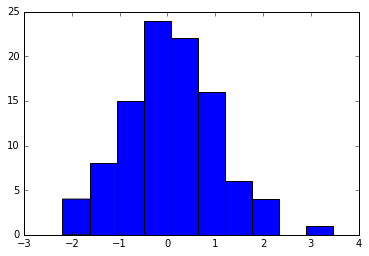

In [28]:
plt.hist(r_rnorm(100))

In [29]:
# Importando pacotes R
from rpy2.robjects.packages import importr

In [30]:
utils = importr("utils")

In [31]:
help_doc = utils.help("help")

In [32]:
help_doc[0]

'/Library/Frameworks/R.framework/Versions/3.3/Resources/library/utils/help/help'

In [33]:
str(help_doc)

R Help on ‘help’help                   package:utils                   R Documentation

_D_o_c_u_m_e_n_t_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     ‘help’ is the primary interface to the help systems.

_U_s_a_g_e:

     help(topic, package = NULL, lib.loc = NULL,
          verbose = getOption("verbose"),
          try.all.packages = getOption("help.try.all.packages"),
          help_type = getOption("help_type"))
     
_A_r_g_u_m_e_n_t_s:

   topic: usually, a name or character string specifying the topic for
          which help is sought.  A character string (enclosed in
          explicit single or double quotes) is always taken as naming a
          topic.

          If the value of ‘topic’ is a length-one character vector the
          topic is taken to be the value of the only element.
          Otherwise ‘topic’ must be a name or a reserved word (if
          syntactically valid) or character string.

          See ‘Details’ for what happens i

''

## Extensão R para o iPython - Função Mágica


In [34]:
# Carregando extensões R
%load_ext rpy2.ipython

In [35]:
# Instalação de pacotes R
%R install.packages("plyr")

/Users/dmpm/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: trying URL 'https://muug.ca/mirror/cran/bin/macosx/mavericks/contrib/3.3/plyr_1.8.4.tgz'

  warnings.warn(x, RRuntimeWarning)
/Users/dmpm/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/Users/dmpm/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  length 805071 bytes (786 KB)

  warnings.warn(x, RRuntimeWarning)
/Users/dmpm/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/Users/dmpm/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/Users/dmpm/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: downloaded 786 KB


  warnings.warn(x, RRuntimeWarning)


--- Please select a CRAN mirror for use in this session ---

The downloaded binary packages are in
	/var/folders/hf/r11rh67x5f95jkmnjlf0sd040000gn/T//Rtmp8xoRnN/downloaded_packages


In [36]:
%R data(mtcars)

array(['mtcars'], 
      dtype='<U6')

In [37]:
%Rpull mtcars

In [38]:
%%R 
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [39]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [40]:
%R print(mean(mtcars$mpg))

[1] 20.09062


### Dúvidas sobre instalação e configuração da linguagem R, consulte nosso treinamento <font color='blue'><a href="http://www.datascienceacademy.com.br/pages/curso-big-data-analytics-r-e-azure">Big Data Analytics com R e Azure</a>.</font>

In [41]:
%R vecx = c(1, 4, 5, 7); sd(vecx); mean(vecx)

array([ 4.25])

In [42]:
%R vecy = c(2,4,3,9)

array([ 2.,  4.,  3.,  9.])

In [43]:
%R lm(formula = vecy ~ vecx)

R object with classes: ('lm',) mapped to:
<ListVector - Python:0x11e68b948 / R:0x11f2dbb50>
[Float..., Float..., Float..., ..., Vector, Formula, DataF...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x11be5a508 / R:0x11f47b148>
[0.080000, 1.040000]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x11e681e48 / R:0x1097d3f18>
[0.880000, -0.240000, -2.280000, 1.640000]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x11e681b88 / R:0x1097d3ed0>
[-9.000000, -4.503332, -2.383969, 1.742611]
  ...
  coefficients: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x11e67ad08 / R:0x11daef740>
[RNULLType, Vector]
  residuals: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') map

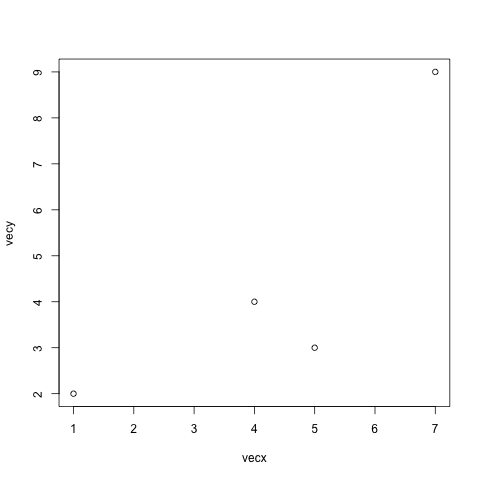

In [44]:
%R plot(vecx, vecy)

In [45]:
# Código Python
import numpy as np
X = np.array([4.5,6.3,7.9])
X.mean()

6.2333333333333343

In [46]:
# Código R
%Rpush X
%R mean(X)

array([ 6.23333333])

In [47]:
# Convertendo um dataframe R para um dataframe Python
pd_df = mtcars

In [48]:
pd_df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


In [49]:
type(pd_df)

pandas.core.frame.DataFrame

## Plots

In [50]:
import rpy2.robjects as robjects

In [51]:
r = robjects.r

In [52]:
x = robjects.IntVector(range(10))

In [53]:
y = r.rnorm(10)

In [54]:
r.X11()

rpy2.rinterface.NULL

In [55]:
# Criando uma matriz a partir de um vetor 
r.layout(r.matrix(robjects.IntVector([1,2,3,2]), nrow = 2, ncol = 2))

R object with classes: ('integer',) mapped to:
<IntVector - Python:0x11e67a708 / R:0x1144e6018>
[       3]

In [56]:
# Gerando o gráfico
r.plot(r.runif(10), y, xlab = "Eixo x", ylab = "Eixo y", col = "red")

rpy2.rinterface.NULL

In [57]:
# Outro Exemplo - Principal Componente Analysis
from rpy2.robjects.packages import importr
graphics = importr('graphics')
grdevices = importr('grDevices')
base = importr('base')
stats = importr('stats')

import array

x = array.array('i', range(10))
y = stats.rnorm(10)

grdevices.X11()

graphics.par(mfrow = array.array('i', [2,2]))
graphics.plot(x, y, ylab = "Eixo y", col = "red")

kwargs = {'ylab':"Eixo y", 'type':"b", 'col':"blue", 'log':"x"}
graphics.plot(x, y, **kwargs)


m = base.matrix(stats.rnorm(100), ncol = 5)
pca = stats.princomp(m)
graphics.plot(pca, main = "Valores")
stats.biplot(pca, main = "biplot")

rpy2.rinterface.NULL

## ggplot

In [58]:
import numpy as np
import pandas as pd
import rpy2.robjects.packages as packages
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro

In [59]:
# Importando o dataset do R, o mtcars
R = ro.r
datasets = packages.importr('datasets')
mtcars = packages.data(datasets).fetch('mtcars')['mtcars']

In [60]:
# Gerando o gráfico com ggplot
gp = ggplot2.ggplot(mtcars)
pyplot = (gp 
      + ggplot2.aes_string(x = 'wt', y = 'mpg')
      + ggplot2.geom_point(ggplot2.aes_string(colour = 'qsec'))
      + ggplot2.scale_colour_gradient(low = "yellow", high = "red") 
      + ggplot2.geom_smooth(method = 'auto') 
      + ggplot2.labs(title = "mtcars", x = 'wt', y = 'mpg'))

pyplot.plot()

## Análise de Variância

In [61]:
import rpy2.robjects as robjects

r = robjects.r

controle = robjects.FloatVector([4.17,5.58,5.18,6.11,4.50,4.61,
                                 5.17,4.53,5.33,5.14])
tratamento = robjects.FloatVector([4.81,4.17,4.41,3.59,5.87,3.83,
                                   6.03,4.89,4.32,4.69])

grupo = r.gl(2, 10, 20, labels = ["Controle","Tratamento"])
peso = controle + tratamento

robjects.globalenv["peso"] = peso
robjects.globalenv["grupo"] = grupo
lm_r = r.lm("peso ~ grupo")

# Imprimindo a análise
print(r.anova(lm_r))


lm_r = r.lm("peso ~ grupo - 1")
print(r.summary(lm_r))

Analysis of Variance Table

Response: peso
          Df Sum Sq Mean Sq F value Pr(>F)
grupo      1 0.6882 0.68820  1.4191  0.249
Residuals 18 8.7292 0.48496               


Call:
(function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
{
    ret.x <- x
    ret.y <- y
    cl <- match.call()
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (method == "model.frame") 
        return(mf)
    else if (method != "qr") 
        warning(gettextf("method = '%s' is not supported. Using 'qr'", 
            method), domain = NA)
    mt <- attr(mf, "terms")
    y <- model.response(mf, "numeric")
    w <- as.vector(model.weights(mf))
    if (!is.

### Dúvidas sobre Análise de Variância na linguagem R, consulte nosso treinamento <font color='blue'><a href="http://www.datascienceacademy.com.br/pages/curso-big-data-analytics-r-e-azure">Big Data Analytics com R e Azure</a>.</font>

In [62]:
print(lm_r.names)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"        



In [63]:
# Imprimindo apenas os coeficientes
print(lm_r.rx2('coefficients'))

  grupoControle grupoTratamento 
          5.032           4.661 



# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>